In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a set of random latitude/longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #if the city is unique, then we will add it to the cities list
    if city not in cities:
            cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

620

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint url with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       # Append the city information into the city_data list
        city_data.append({"City" : city.title(),
                         "Lat" : city_lat,
                         "Lng" : city_lng,
                         "Max Temp" : city_max_temp,
                         "Humidity" : city_humidity,
                         "Cloudiness" : city_clouds,
                         "Wind Speed" : city_wind,
                         "Country" : city_country,
                         "Date" : city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | sao jose da coroa grande
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | polewali
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | bafq
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | husavik
Processing Record 12 of Set 1 | luis correia
Processing Record 13 of Set 1 | waddan
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | san policarpo
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | bastia
Processing Record 22 of Set 1 | nikolskoye
Proc

In [12]:
print(len(city_data))

572


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Jose Da Coroa Grande,-8.8978,-35.1478,77.45,81,63,10.63,BR,2021-10-15 20:50:39
1,Rikitea,-23.1203,-134.9692,74.77,73,26,4.99,PF,2021-10-15 20:54:26
2,Ushuaia,-54.8000,-68.3000,51.46,46,40,16.11,AR,2021-10-15 20:54:27
3,Cape Town,-33.9258,18.4232,58.08,73,75,3.00,ZA,2021-10-15 20:50:35
4,Polewali,-3.4324,119.3435,77.92,85,89,2.95,ID,2021-10-15 20:54:27
5,Kapaa,22.0752,-159.3190,82.38,68,17,5.01,US,2021-10-15 20:54:28
6,Bafq,31.6128,55.4107,67.28,19,0,2.26,IR,2021-10-15 20:54:28
7,Mataura,-46.1927,168.8643,50.22,60,100,4.03,NZ,2021-10-15 20:54:29
8,Souillac,-20.5167,57.5167,71.37,94,75,10.36,MU,2021-10-15 20:54:30
9,Husavik,66.0449,-17.3389,35.51,87,83,4.00,IS,2021-10-15 20:51:49


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Jose Da Coroa Grande,BR,2021-10-15 20:50:39,-8.8978,-35.1478,77.45,81,63,10.63
1,Rikitea,PF,2021-10-15 20:54:26,-23.1203,-134.9692,74.77,73,26,4.99
2,Ushuaia,AR,2021-10-15 20:54:27,-54.8000,-68.3000,51.46,46,40,16.11
3,Cape Town,ZA,2021-10-15 20:50:35,-33.9258,18.4232,58.08,73,75,3.00
4,Polewali,ID,2021-10-15 20:54:27,-3.4324,119.3435,77.92,85,89,2.95
5,Kapaa,US,2021-10-15 20:54:28,22.0752,-159.3190,82.38,68,17,5.01
6,Bafq,IR,2021-10-15 20:54:28,31.6128,55.4107,67.28,19,0,2.26
7,Mataura,NZ,2021-10-15 20:54:29,-46.1927,168.8643,50.22,60,100,4.03
8,Souillac,MU,2021-10-15 20:54:30,-20.5167,57.5167,71.37,94,75,10.36
9,Husavik,IS,2021-10-15 20:51:49,66.0449,-17.3389,35.51,87,83,4.00


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

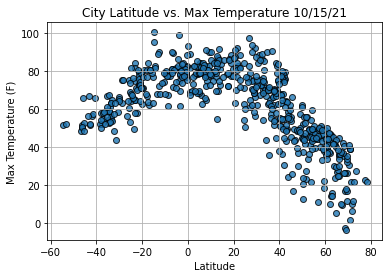

In [24]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()





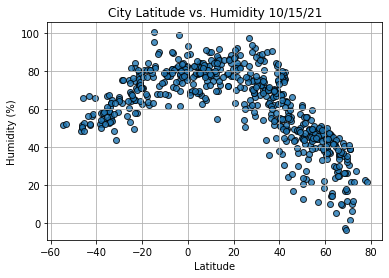

In [20]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()


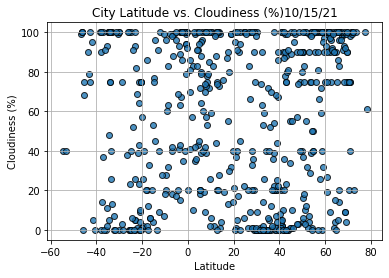

In [22]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()


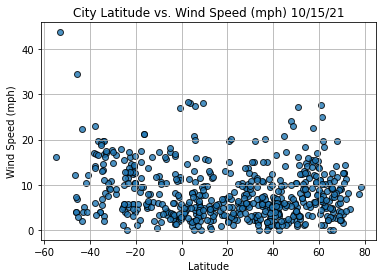

In [23]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()
